In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from qutip import  *

# Exact Diagonalization for Open 1D chain

Here we have transforme the fermion occupation basis representation to a Spin one in order to better use quspin

**What if I try out the jordan wigner strings for the L site chain instead of doing this confusing stuff manually**

# Two sites

In [2]:
L = 2 # Num of sites
D = 2 # local hilbert space
J = 1 # interaction
max_t = 40 # maximum time
tsteps = 900 # number of time steps
Sup =  sigmap() # creation
Sdown = sigmam() # annihilation
gamma = 0.2
a0 = 1.0 
b0=0.0
c0 = 0
d0=0.


In [3]:
# now the number operators
n1 = tensor(Sup*Sdown,identity(2))
n2 = tensor(identity(2),Sup*Sdown)


In [4]:
# create the initial state
ket1 = tensor(basis(D,0) , basis(D,1)) 
ket2 = tensor(basis(D,1) , basis(D,0)) 

# density matrix
rho = a0*ket1*ket1.dag() + b0*ket1*ket2.dag() + c0*ket2*ket1.dag() + d0*ket2*ket2.dag()
rho

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [5]:
# Create the composite hamiltonian
H = -0.5*J*(tensor(Sup,Sdown) + tensor(Sdown,Sup))
# now the number operators
n1 = tensor(Sup*Sdown,identity(2))
n2 = tensor(identity(2),Sup*Sdown)

H

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0. ]]

In [6]:
times = np.linspace(0.0, max_t, tsteps)

result = mesolve(H, rho, times, c_ops=[np.sqrt(gamma)*n1,np.sqrt(gamma)*n2] , e_ops=[n1,n2])
print(result)


<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00013113021850585938
    preparation time: 0.00015091896057128906
    run time: 0.03768301010131836
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 40.0] (900 steps)
  Number of e_ops: 2
  State not saved.
>


Text(0, 0.5, 'local densities')

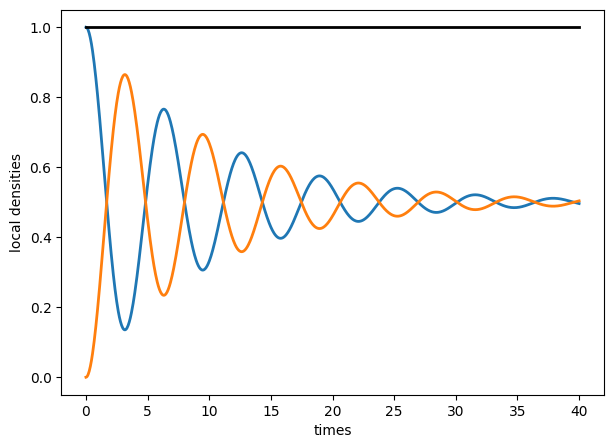

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

plt.plot(times, result.expect[0], linewidth=2)
plt.plot(times, result.expect[1],linewidth=2)
plt.plot(times, result.expect[0] + result.expect[1], linewidth=2, c='black')

ax.set_xlabel("times")
ax.set_ylabel("local densities")

## Analytic solution to eigenvalue equaiton

Notice how the initial condition makes this thing kinda pointless but a different one generates interesting effects


Text(0, 0.5, 'Solutions')

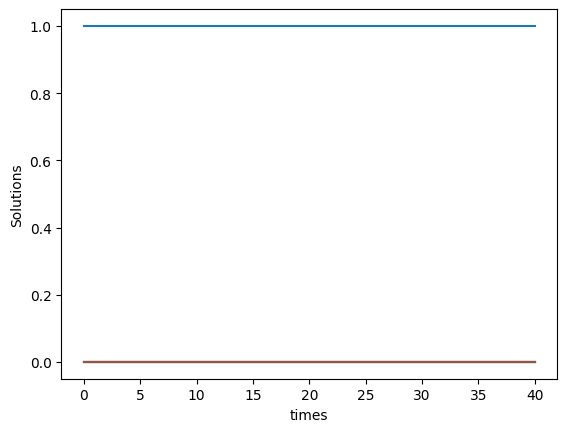

In [8]:
eig_a = 0
eig_b = -gamma
eig_c =  0.5*(-gamma-np.sqrt(-4+gamma**2+0*1j)) 
eig_d = 0.5*(-gamma+np.sqrt(-4+gamma**2+0*1j))
# the analytic solution of the eignebalues of the lindbladdian is
at = a0*np.exp(eig_a*times)
bt = b0*np.exp(eig_b*times)
ct = c0*np.exp(eig_c*times) # J is assumed to be 1
dt = d0*np.exp(eig_d*times)

plt.plot(times,at.real)
plt.plot(times,bt)
plt.plot(times,ct.real)
plt.plot(times,ct.imag)
plt.plot(times,dt.real,)
plt.plot(times,dt.imag)

plt.xlabel("times")
plt.ylabel("Solutions")

## Eigenvalues of the liouvillian

look at how the eigen values of the Liouvillian indeed correspond to the analytical calculation.
**Notice the three-fold degeneracy here, this is due to the number conserving sectors in the Liouvillian**, of which there are three: 1-particle, 2-particle and 3-particle .

In [9]:
print("a exponent: ", eig_a)
print("b exponent: ", eig_b)
print("c exponent: ", eig_c )
print("d exponent: ", eig_d )

a exponent:  0
b exponent:  -0.2
c exponent:  (-0.1-0.99498743710662j)
d exponent:  (-0.1+0.99498743710662j)


In [10]:
# n1 = tensor(Sdown,identity(2))
# n2 = tensor(identity(2),Sdown)

L = liouvillian(H, [np.sqrt(gamma)*n1, np.sqrt(gamma)*n2])
eval_ = L.eigenenergies()

eval_

array([-0.2+0.00000000e+00j, -0.2+0.00000000e+00j, -0.2-1.04841280e-16j,
       -0.1+5.00000000e-01j, -0.1+5.00000000e-01j, -0.1+5.00000000e-01j,
       -0.1+5.00000000e-01j, -0.1-5.00000000e-01j, -0.1-5.00000000e-01j,
       -0.1-5.00000000e-01j, -0.1-5.00000000e-01j, -0.1-9.94987437e-01j,
       -0.1+9.94987437e-01j,  0. +0.00000000e+00j,  0. +0.00000000e+00j,
        0. +0.00000000e+00j])

# L Sites

In [11]:
L = 2 # Num of sites
D = 2 # local hilbert space
J = 1 # interaction
gamma = 0.2 # the dephasing term for the collapse operators
max_t = 40 # maximum time
tsteps = 900 # number of time steps

 # I have inverted the notation here so the num operator from qutip is counting the down spins as up spins
# so I have to dedine my own number operator like this to be consisten with my convention
colapse_operator = Sup*Sdown 
# colapse_operator = Sdown
expect_operator = Sup*Sdown # for the expectation value tracking

Sup =  sigmap() # creation
Sdown = sigmam() # annihilation

initial_conditions = np.zeros(L**2) # initial conditions of the density matrix
initial_conditions[-1] = 1.0 # particle starts localize in the first site (index in qutip is reversed)
print(initial_conditions)



[0. 0. 0. 1.]


In [12]:
basis(D,1) # this is spin down 
basis(D,0) # this is spin up
basis_list = []

# Create the basis vectors, for this case there is a single spin up
for site in range(0,L):
    print(site)
    # initialize everything in down state
    single_state_list = [basis(D,1)]*L
    # flip the site spin up
    single_state_list[site] = basis(D,0)
    ket = tensor(single_state_list)
    basis_list.append(ket)


0
1


In [13]:
# make all possible 2 elemet combinations where order matters so we can get the density matrix
combination_list = list(itertools.product(basis_list, basis_list))

# initialize a density matrix object that is full of zeros
rho = 0*combination_list[0][0]*combination_list[0][1].dag()

# build the density matrix
for i in reversed(range(0,len(combination_list))):
    rho = rho + initial_conditions[i]*combination_list[i][0]*combination_list[i][1].dag()


In [14]:
# create the hamiltonian
# place the spin up and down operators at each site accordingly
ident_tensor = tensor([identity(2)]*L) 

H = 0*ident_tensor
for i in range(1,L):
    j=L-i
    j_plus = L-(i+1)
        
    op_list = [identity(2)]*L
    op_list[j] = Sup
    op_list[j_plus] = Sdown

    conj_op_list= [identity(2)]*L
    conj_op_list[j] = Sdown
    conj_op_list[j_plus] = Sup

    H += tensor(op_list) + tensor(conj_op_list)

H = -0.5*J*H
H

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0. ]]

In [15]:
# create the collapse operators. Can be densities or ladder local operators
# also creates the operators to track the relevant expectation values, mostyle densities
collapse_ops = []
expect_ops = []
num(2)

for i in range(1,L+1):
    # remember the order is reversed
    j = L-i
    # for collapse operators
    op_list = [identity(2)]*L
    op_list[j] = colapse_operator
    nj = tensor(op_list)
    collapse_ops.append(np.sqrt(gamma)*nj)
    
    # for the expectation values
    op_list = [identity(2)]*L
    op_list[j] = expect_operator
    nj = tensor(op_list)
    expect_ops.append(nj)
    

In [16]:
times = np.linspace(0.0, max_t, tsteps)

result = mesolve(H, rho, times, c_ops=collapse_ops , e_ops=expect_ops)

result

<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 3.981590270996094e-05
    preparation time: 0.00012111663818359375
    run time: 0.03730177879333496
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 40.0] (900 steps)
  Number of e_ops: 2
  State not saved.
>

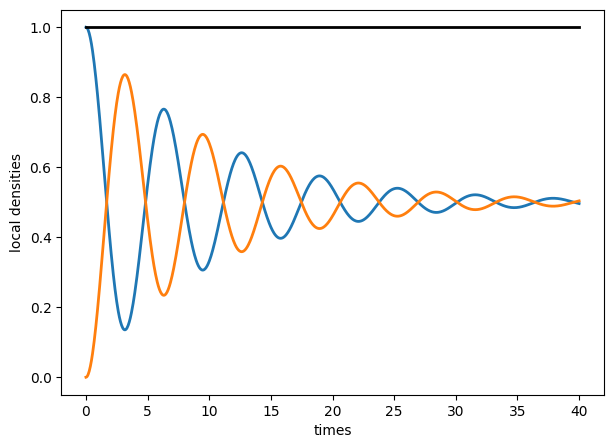

In [17]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
# plot
for i in range(0,len(result.expect)):
    ax.plot(times, result.expect[i], linewidth=2.0)
    
# get the total particle number
# get the sum of the local densities
n_tot = np.sum(result.expect, axis=0)
ax.plot(times, n_tot, c='black', linewidth=2.0)

ax.set_xlabel("times")
ax.set_ylabel("local densities")

plt.savefig("../plots/occupations_L={}.pdf".format(L))


## Eigen values of the Liouvillian

**For the $L=4$ case with local densities as collapse operators we have 5-fold degeneracy corresponding to the 4-particle, 3-particle,  2-particle,  1-particle and  0-particle sectors**

In [18]:
L = liouvillian(H, collapse_ops)
eval_ = L.eigenenergies()

eval_

array([-0.2+0.00000000e+00j, -0.2+0.00000000e+00j, -0.2-1.04841280e-16j,
       -0.1+5.00000000e-01j, -0.1+5.00000000e-01j, -0.1+5.00000000e-01j,
       -0.1+5.00000000e-01j, -0.1-5.00000000e-01j, -0.1-5.00000000e-01j,
       -0.1-5.00000000e-01j, -0.1-5.00000000e-01j, -0.1-9.94987437e-01j,
       -0.1+9.94987437e-01j,  0. +0.00000000e+00j,  0. +0.00000000e+00j,
        0. +0.00000000e+00j])